In [1]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
import networkx as nx

In [2]:
# vole network

Edges=[[1418, 1437], [1418, 1433], [1418, 1438], [1419, 1345], [1439, 1440], [1439, 1438], [1439, 1441], [1442, 1395], [1442, 1443], [1442, 1444], [1442, 1445], [1442, 1386], [1442, 1249], [1446, 1447], [1446, 1448], [1446, 1436], [1446, 1449], [1446, 1450], [1446, 1451], [1452, 1433], [1445, 1453], [1445, 1230], [1445, 1385], [1454, 1435], [1454, 1370], [1454, 1455], [1454, 1429], [1440, 1453], [1440, 1438], [1440, 1345], [1440, 1441], [1345, 1453], [1421, 1447], [1421, 1256], [1449, 1447], [1449, 1448], [1449, 1436], [1449, 1450], [1449, 1451], [1370, 1435], [1370, 1230], [1370, 1429], [1370, 1455], [1230, 1430], [1230, 1385], [1430, 1435], [1430, 1412], [1430, 1385], [1451, 1447], [1451, 1365], [1451, 1448], [1451, 1436], [1451, 1256], [1451, 1450], [1397, 1365], [1397, 1389], [1397, 1436], [1397, 1256], [1397, 1367], [1443, 1395], [1365, 1389], [1365, 1256], [1365, 1367], [1444, 1386], [1438, 1456], [1438, 1441], [1438, 1433], [1385, 1453], [1367, 1389], [1367, 1436], [1367, 1256], [1367, 1457], [1458, 1354], [1458, 1437], [1458, 1459], [1453, 1456], [1453, 1354], [1456, 1433], [1456, 1354], [1460, 1412], [1450, 1447], [1450, 1448], [1450, 1436], [1437, 1354], [1437, 1459], [1461, 1249], [1447, 1448], [1447, 1436], [1447, 1256], [1395, 1249], [1457, 1358], [1457, 1389], [1448, 1436], [1354, 1459], [1389, 1358], [1389, 1462], [1389, 1256], [1389, 1259], [1259, 1462], [1412, 1415], [1358, 1415], [1429, 1435], [1429, 1455], [1436, 1256], [1435, 1455]]

In [3]:
Total_Edges=[]

for i in range(0,2*len(Edges)):
    if i<len(Edges):
        Total_Edges.append(Edges[i])
    else:
        Total_Edges.append([Edges[i-len(Edges)][1],Edges[i-len(Edges)][0]])

In [4]:
# prenodes gets all the numbers in Total_Edges

prenodes=[]

for i in range(0,len(Edges)):
    prenodes.append(Edges[i][0])
    prenodes.append(Edges[i][1])
prenodes.sort()

In [5]:
# nodes gets all the elements in prenodes, without duplication
nodes = [] 
for i in prenodes: 
    if i not in nodes: 
        nodes.append(i)

In [6]:
G = nx.Graph()
G.add_edges_from([(1418, 1437), (1418, 1433), (1418, 1438), (1419, 1345), (1439, 1440), (1439, 1438), (1439, 1441), (1442, 1395), (1442, 1443), (1442, 1444), (1442, 1445), (1442, 1386), (1442, 1249), (1446, 1447), (1446, 1448), (1446, 1436), (1446, 1449), (1446, 1450), (1446, 1451), (1452, 1433), (1445, 1453), (1445, 1230), (1445, 1385), (1454, 1435), (1454, 1370), (1454, 1455), (1454, 1429), (1440, 1453), (1440, 1438), (1440, 1345), (1440, 1441), (1345, 1453), (1421, 1447), (1421, 1256), (1449, 1447), (1449, 1448), (1449, 1436), (1449, 1450), (1449, 1451), (1370, 1435), (1370, 1230), (1370, 1429), (1370, 1455), (1230, 1430), (1230, 1385), (1430, 1435), (1430, 1412), (1430, 1385), (1451, 1447), (1451, 1365), (1451, 1448), (1451, 1436), (1451, 1256), (1451, 1450), (1397, 1365), (1397, 1389), (1397, 1436), (1397, 1256), (1397, 1367), (1443, 1395), (1365, 1389), (1365, 1256), (1365, 1367), (1444, 1386), (1438, 1456), (1438, 1441), (1438, 1433), (1385, 1453), (1367, 1389), (1367, 1436), (1367, 1256), (1367, 1457), (1458, 1354), (1458, 1437), (1458, 1459), (1453, 1456), (1453, 1354), (1456, 1433), (1456, 1354), (1460, 1412), (1450, 1447), (1450, 1448), (1450, 1436), (1437, 1354), (1437, 1459), (1461, 1249), (1447, 1448), (1447, 1436), (1447, 1256), (1395, 1249), (1457, 1358), (1457, 1389), (1448, 1436), (1354, 1459), (1389, 1358), (1389, 1462), (1389, 1256), (1389, 1259), (1259, 1462), (1412, 1415), (1358, 1415), (1429, 1435), (1429, 1455), (1436, 1256), (1435, 1455)])

In [7]:
# define the stationary density vector

p_stationary=[]
for i in nodes:
    p_stationary.append(G.degree[i]/(2*G.number_of_edges()))

In [8]:
# define initial density vector, for directed edges

p0=[]
for i in Total_Edges:
    p0.append(1/(G.number_of_nodes()*G.degree[i[1]]))

In [9]:
p1=[]
for i in nodes:
    p1.append(1/(G.number_of_nodes()))

In [10]:
Empty=np.zeros((len(Total_Edges), len(Total_Edges)))

# Find the adjacent matrix A
def A(a,b):
    for i in range(0, len(Total_Edges)):
        for j in range(0, len(Total_Edges)):
            if Total_Edges[i][1]==Total_Edges[j][0]:
                if Total_Edges[i][0]==Total_Edges[j][1]:
                    Empty[i,j] = a
                elif [Total_Edges[i][0], Total_Edges[j][1]] in Total_Edges:
                    Empty[i,j] = b
                else:
                    Empty[i,j] = 1
    return Empty

# find the diagonal matrix D

def D_inverse(a,b):
    D=np.sum(A(a,b), axis=1)
    D=np.diag(D)
    D_inverse=inv(D)
    return D_inverse

# find transition matrix P

def P(a,b):
    P=np.transpose(np.dot(D_inverse(a,b), A(a,b)))
    return P


In [11]:
# dist is for alpha=0.01

dist=[]
dist=np.asarray(dist)
dist=np.append(dist, LA.norm(np.asarray(p1)-np.asarray(p_stationary)))

p=np.asarray(p0)
p=p/sum(p)

for k in range(0,1000):
    p_of_nodes=[]
    p_of_nodes=np.asarray(p_of_nodes)
    for i in nodes:
        temp=0
        for j in range(0, len(Total_Edges)):
            if Total_Edges[j][1]==i:
                temp=temp+p[j]
        p_of_nodes=np.append(p_of_nodes, temp)
    p=np.dot(P(0.01, 1), p)
    p=p/sum(p)
    dist=np.append(dist, LA.norm(p_of_nodes-np.asarray(p_stationary)))

In [12]:
# dist1 is for alpha=0.1

dist1=[]
dist1=np.asarray(dist1)
dist1=np.append(dist1, LA.norm(np.asarray(p1)-np.asarray(p_stationary)))

p=np.asarray(p0)
p=p/sum(p)

for k in range(0,1000):
    p_of_nodes=[]
    p_of_nodes=np.asarray(p_of_nodes)
    for i in nodes:
        temp=0
        for j in range(0, len(Total_Edges)):
            if Total_Edges[j][1]==i:
                temp=temp+p[j]
        p_of_nodes=np.append(p_of_nodes, temp)
    p=np.dot(P(0.1, 1), p)
    p=p/sum(p)
    dist1=np.append(dist1, LA.norm(p_of_nodes-np.asarray(p_stationary)))

In [13]:
# dist2 is for alpha=1

dist2=[]
dist2=np.asarray(dist2)
dist2=np.append(dist2, LA.norm(np.asarray(p1)-np.asarray(p_stationary)))

p=np.asarray(p0)
p=p/sum(p)

for k in range(0,1000):
    p_of_nodes=[]
    p_of_nodes=np.asarray(p_of_nodes)
    for i in nodes:
        temp=0
        for j in range(0, len(Total_Edges)):
            if Total_Edges[j][1]==i:
                temp=temp+p[j]
        p_of_nodes=np.append(p_of_nodes, temp)
    p=np.dot(P(1, 1), p)
    p=p/sum(p)
    dist2=np.append(dist2, LA.norm(p_of_nodes-np.asarray(p_stationary)))

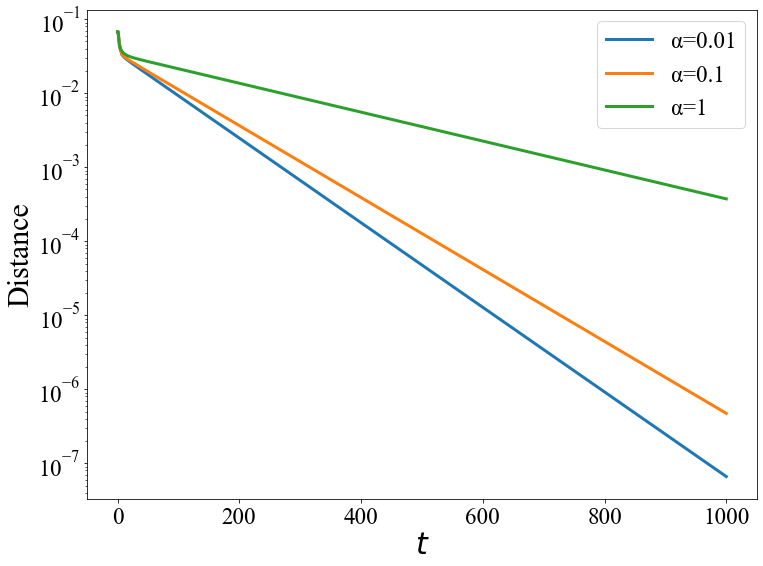

In [14]:
figsize = 12,9
figure, ax = plt.subplots(figsize=figsize)

A,=plt.semilogy(dist,label='\u03B1=0.01',linewidth=3.0)
B,=plt.semilogy(dist1,label='\u03B1=0.1',linewidth=3.0)
C,=plt.semilogy(dist2,label='\u03B1=1',linewidth=3.0)

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}
legend = plt.legend(handles=[A,B,C],prop=font1)

plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}
plt.xlabel('$t$',font2)
plt.ylabel('Distance',font2)

plt.savefig('relaxation',dpi=300, bbox_inches = "tight")     # tight 可以防止截图时候 label out of range
plt.show()